Листайте к заданию, делала на примере с генами.

In [18]:
library(ggplot2)
library(broom)
library(tidyverse)

# ANOVA
Задача: сравнить несколько групп между собой. В таком случае применяется так называемый однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. А та количественная переменная,по степени выраженности которой мы сравниваем группы, называется зависимая переменная. 

При этом тестируется следующая гипотеза:

 - $H_0: \mu_1=\mu_2= ... =\mu_k$
 - $H_1$: есть ХОТЯ БЫ одно различие 


 Используется простая интуиция: если мы поделим на группы согласно анализируемому фактору, а потом выяснится, что изменчивость внутри групп сильно отличается от межгрупповой, то фактор играет важную роль

 Очень хорошее объяснение на степике (https://stepik.org/lesson/8083/step/1?unit=1362).
И хорошая книжка по статистике (http://www.tf.uns.ac.rs/~omorr/radovan_omorjan_003_prII/r-examples/os3.pdf)

## Пример


In [19]:
example <- matrix(c(3,1,2,5,3,4,7,6,5), ncol=3)
colnames(example) <- c('one', 'two','three')
example.table <- as.table(example)

In [20]:
example.table

  one two three
A   3   5     7
B   1   3     6
C   2   4     5

Что здесь можем посмотреть?

 - Ну тут есть какое-то общее среднее, можем его посчитать, получим представление о центральной тенденции для всех данных
 - Можем посчитать изменчивость в данных (сумму квадратов отклонения, без учета разделения на группы)
 -  Можем посчитать изменчивость внутри каждой группы
 - Можем посмотреть как сильно отличается среднее по каждой группе от общего среднего

Общая изменчивость в данных может быть при таком подходе объясняться только изменчивостью внутригрупповой и межгрупповой. Если вдруг так оказалось, что внутригрупповая изменчивость сильно ниже, то это можно объяснять только тем, что средние существенно различны. Что такое теперь сильно ниже. Ну опять нужно какое-то распределение и какая-то статистика.


Статистика тут будет следующая:

$$F = \frac{Sum.sq.Between/(m-1)}{Sum.sq.Within/(N-m)}$$

А распределение у нее должно быть распределением Фишера, в том, случае если выполняется куча предположений

In [21]:
mean(example)

[1] 4

In [22]:
colMeans(example)

one   two three 
    2     4     6

## Задание.
Самостоятельно прочитать (послушать про предположения) и научиться их проверять

### Пример


In [23]:
filename = "https://stepik.org/media/attachments/lesson/8083/genetherapy.csv"
genes = read.csv(file = filename)
head(genes)

,expr,Therapy
,<int>,<fct>
1,100,A
2,96,A
3,101,A
4,95,A
5,103,A
6,99,A


In [24]:
str(genes)

'data.frame':	60 obs. of  2 variables:
 $ expr   : int  100 96 101 95 103 99 97 96 98 106 ...
 $ Therapy: Factor w/ 4 levels "A","B","C","D": 1 1 1 1 1 1 1 1 1 1 ...


What are the different therapies?

In [25]:
# Show the levels
levels(genes$Therapy)

[1] "A" "B" "C" "D"

Looking at the expr by Therapy variable;

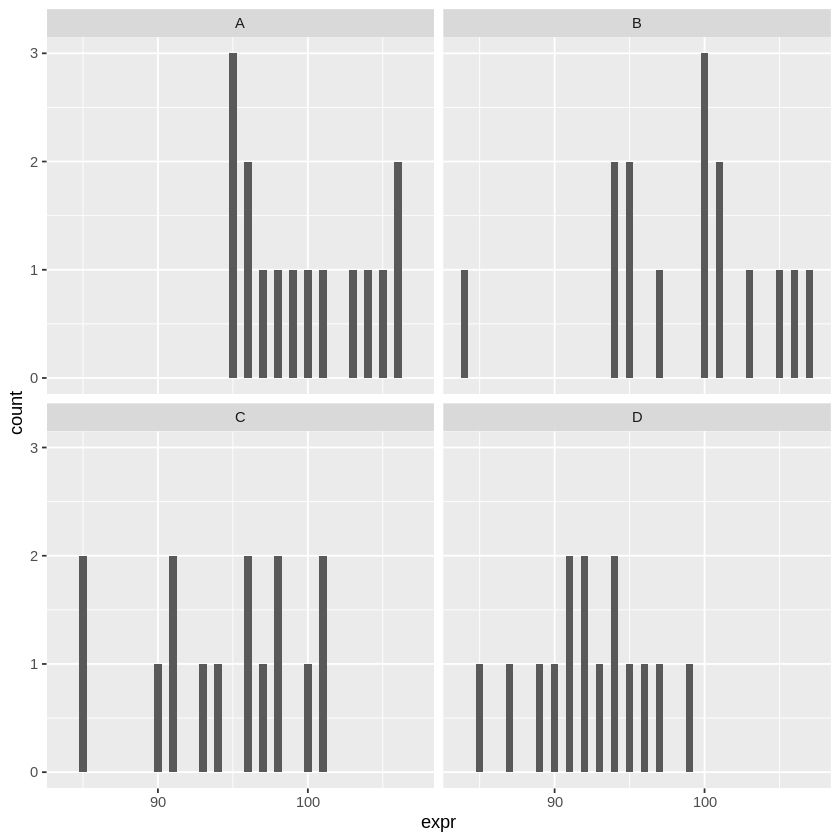

In [26]:
#посмотрим на уровень экспрессии гена в зависимости от типа терапии
ggplot(genes, aes(x = expr)) +
  # Add a histogram layer
  geom_histogram(binwidth = 0.5) +
  # Facet by class
  facet_wrap(~ Therapy)

Boxplot for the same data;

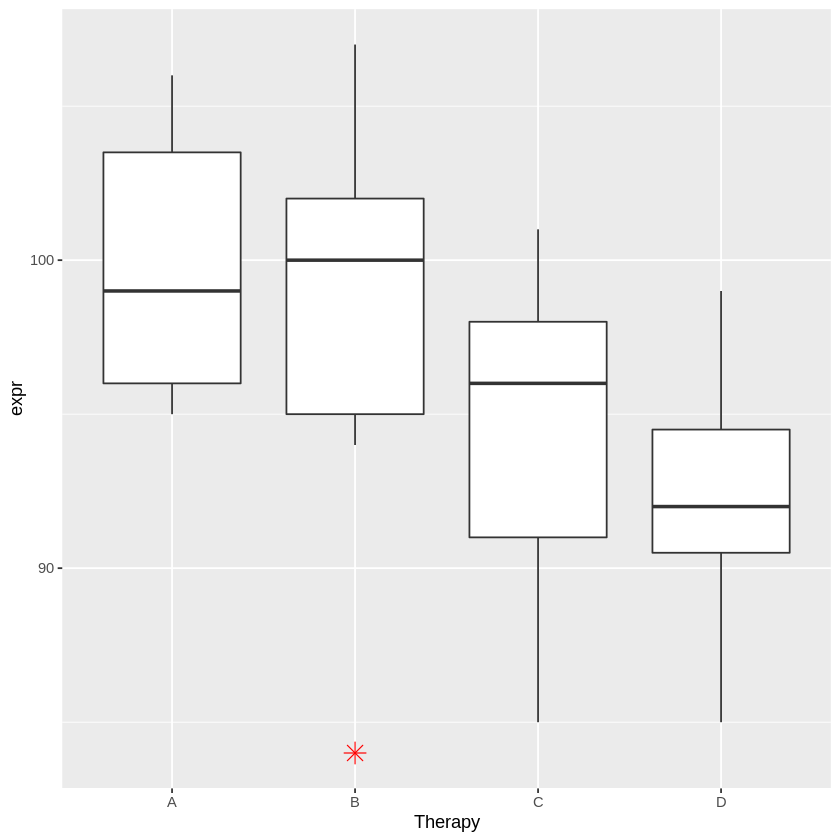

In [27]:
#посмотрим на уровень экспрессии гена в зависимости от типа терапии
ggplot(genes, aes(x = Therapy, y = expr)) +
  # Add a histogram layer
  geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4)

The means and std's of expr by Therapy;

In [28]:
group_by(genes, Therapy) %>%
  summarise(
    count = n(),
    mean = mean(expr, na.rm = TRUE),
    sd = sd(expr, na.rm = TRUE)
  )

`summarise()` ungrouping output (override with `.groups` argument)



Therapy,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
A,15,99.73333,4.165619
B,15,98.80000,5.894307
C,15,94.40000,5.193402
D,15,92.33333,3.735289


Now we run ANOVA

In [29]:
# Запускаем ANOVA 
aov_genes <- aov(expr ~ Therapy, data = genes)

# Tidy the model
tidy(aov_genes)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Therapy,3,560.7167,186.90556,8.037302,0.0001524972
Residuals,56,1302.2667,23.25476,NA,NA


In [30]:
res.aov <- aov(expr ~ Therapy, data = genes)
summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Therapy      3  560.7  186.91   8.037 0.000152 ***
Residuals   56 1302.3   23.25                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The significance is quite high, since p-value is less than 0.001.

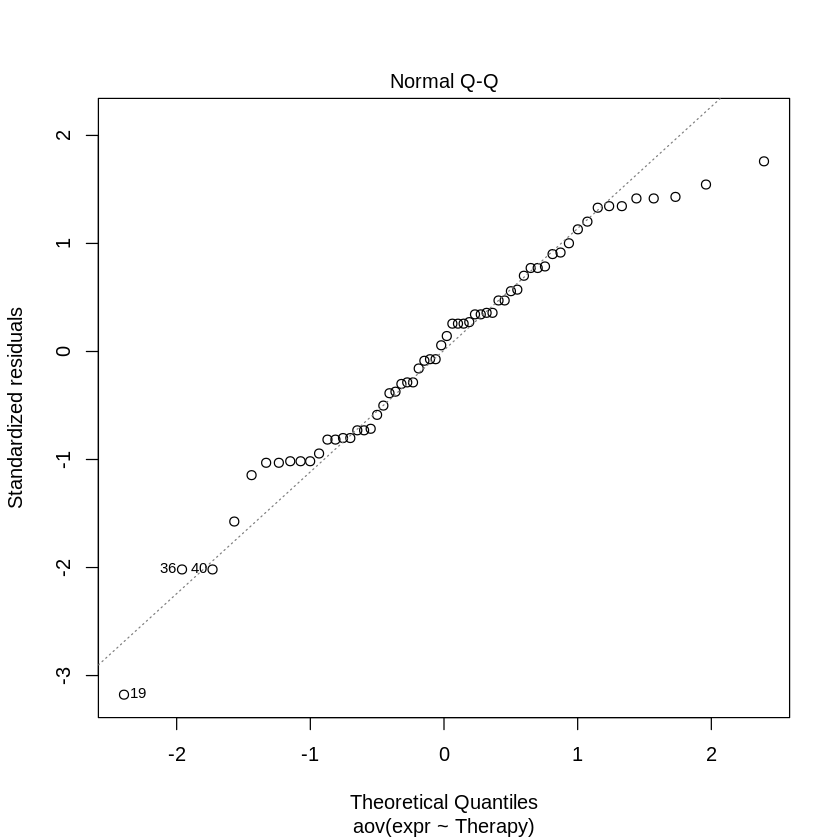

In [42]:
#Проверка на нормальность
plot(res.aov, 2)

In [32]:
#Проверка на равенство дисперсий
genes %>%
  # Group by class
  group_by(Therapy) %>%
  # Calculate the std dev of wordsum as std_dev_wordsum
  summarize(std_dev_expr = sd(expr))

`summarise()` ungrouping output (override with `.groups` argument)



Therapy,std_dev_expr
<fct>,<dbl>
A,4.165619
B,5.894307
C,5.193402
D,3.735289


Дисперсии достаточно различны?

Теперь интересно посмотреть, а где всё-таки кроется группа(-ы) с отличающимися значениями.

In [33]:
# Run a pairwise t-test on wordsum and class, without adjustment
t_test_results <- pairwise.t.test(genes$expr, genes$Therapy, p.adjust.method = "none")

# Tidy the result
tidy(t_test_results)

group1,group2,p.value
<chr>,<chr>,<dbl>
B,A,5.981773e-01
C,A,3.709258e-03
D,A,9.581505e-05
C,B,1.542269e-02
D,B,5.381693e-04
D,C,2.454958e-01


С поправкой Тьюки.

In [34]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expr ~ Therapy, data = genes)

$Therapy
          diff        lwr        upr     p adj
B-A -0.9333333  -5.595897  3.7292308 0.9514195
C-A -5.3333333  -9.995897 -0.6707692 0.0188860
D-A -7.4000000 -12.062564 -2.7374358 0.0005424
C-B -4.4000000  -9.062564  0.2625642 0.0710413
D-B -6.4666667 -11.129231 -1.8041025 0.0029443
D-C -2.0666667  -6.729231  2.5958975 0.6457935


Видим, что между группами A-C, A-D, B-D среднее отличается. Вот и всё.

# Множественные сравнения

Почему нельзя взять и попарно сравнить все группы между собой так, как мы только что это сделали?
Давайте вспомним задачку из теории вероятности

Посмотрите лекцию https://www.youtube.com/watch?v=7To5LPZ9mxc

Если мы кучу раз сравниваем, то с большей вероятностью подтвердим то, что хотим, а оно нам не надо, потому что есть риск совершить ошибку первого рода - найти то, чего на самом деле нет.

Вот почему важно пользоваться поправками Бонферрони или Тьюки.

## Парадокс дней рождений

В группе, состоящей из 23 или более человек, вероятность совпадения дней рождения (число и месяц) хотя бы у двух людей превышает 50 %. Например, если в классе 23 ученика или более, то более вероятно то, что у какой-то пары одноклассников дни рождения придутся на один день, чем то, что у каждого будет свой неповторимый день рождения.

Для 57 и более человек вероятность такого совпадения превышает 99 %, хотя 100 % она достигает, согласно принципу Дирихле (здравому смыслу), только тогда, когда в группе не менее 367 человек (ровно на 1 больше, чем число дней в високосном году; с учётом високосных лет).

Здесь отличное объяснение с симуляцией в R
https://stepik.org/lesson/8085/step/10?unit=1364

С Бонферрони, жёсткая поправка

In [35]:
# Run a pairwise t-test on wordsum and class, with adjustment
t_test_results <- pairwise.t.test(genes$expr, genes$Therapy, p.adjust.method = "bonferroni")

# Tidy the result
tidy(t_test_results)

group1,group2,p.value
<chr>,<chr>,<dbl>
B,A,1.0000000000
C,A,0.0222555470
D,A,0.0005748903
C,B,0.0925361171
D,B,0.0032290157
D,C,1.0000000000


Без поправки

In [36]:
# Run a pairwise t-test on wordsum and class, without adjustment
t_test_results <- pairwise.t.test(genes$expr, genes$Therapy, p.adjust.method = "fdr")

# Tidy the result
tidy(t_test_results)

group1,group2,p.value
<chr>,<chr>,<dbl>
B,A,0.5981772561
C,A,0.0074185157
D,A,0.0005748903
C,B,0.0231340293
D,B,0.0016145078
D,C,0.2945949347


### Критерий Тьюки
Tukey HSD (Tukey Honest Significant Differences, R function: TukeyHSD()) it calculates post hoc comparisons on each factor in the model

In [37]:
TukeyHSD(aov_genes)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expr ~ Therapy, data = genes)

$Therapy
          diff        lwr        upr     p adj
B-A -0.9333333  -5.595897  3.7292308 0.9514195
C-A -5.3333333  -9.995897 -0.6707692 0.0188860
D-A -7.4000000 -12.062564 -2.7374358 0.0005424
C-B -4.4000000  -9.062564  0.2625642 0.0710413
D-B -6.4666667 -11.129231 -1.8041025 0.0029443
D-C -2.0666667  -6.729231  2.5958975 0.6457935


### Задание 
Посмотрите различаются ли какие-то показатели по континентам 

In [38]:
filename = "https://raw.githubusercontent.com/bioinformatics-core-shared-training/intermediate-stats/master/globalBreastCancerRisk.csv"
cancer <- read.csv(file = filename)
head(cancer)

,country,continent,year,lifeExp,pop,gdpPercap,NewCasesOfBreastCancerIn2002,AlcoholComsumption,BloodPressure,BodyMassIndex,Cholestorol,Smoking
,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asia,2002,42.129,25268405,726.7341,26.8,0.02,124.2085,20.65274,4.295170,NA
2,Albania,Europe,2002,75.651,3508512,4604.2117,57.4,6.68,129.0609,25.27082,4.918646,4.0
3,Algeria,Africa,2002,70.994,31287142,5288.0404,23.5,0.96,130.4024,25.69948,4.848951,0.3
4,Angola,Africa,2002,41.003,10866106,2773.2873,23.1,5.40,129.9282,22.26093,4.499115,NA
5,Argentina,Americas,2002,74.340,38331121,8797.6407,73.9,10.00,119.6538,26.70460,5.143871,25.4
6,Australia,Oceania,2002,80.370,19546792,30687.7547,83.2,10.02,120.5113,26.25957,5.326858,21.8


In [39]:
str(cancer)

'data.frame':	123 obs. of  12 variables:
 $ country                     : Factor w/ 123 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ continent                   : Factor w/ 5 levels "Africa","Americas",..: 3 4 1 1 2 5 4 3 3 4 ...
 $ year                        : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ lifeExp                     : num  42.1 75.7 71 41 74.3 ...
 $ pop                         : int  25268405 3508512 31287142 10866106 38331121 19546792 8148312 656397 135656790 10311970 ...
 $ gdpPercap                   : num  727 4604 5288 2773 8798 ...
 $ NewCasesOfBreastCancerIn2002: num  26.8 57.4 23.5 23.1 73.9 83.2 70.5 40.2 16.6 92 ...
 $ AlcoholComsumption          : num  0.02 6.68 0.96 5.4 10 ...
 $ BloodPressure               : num  124 129 130 130 120 ...
 $ BodyMassIndex               : num  20.7 25.3 25.7 22.3 26.7 ...
 $ Cholestorol                 : num  4.3 4.92 4.85 4.5 5.14 ...
 $ Smoking                     : num  NA 4 0.3 NA 25.4 21.8 40.1

In [43]:
# Compute the analysis of variance
res.aov <- aov(lifeExp ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
continent     4  12263    3066   56.78 <2e-16 ***
Residuals   118   6371      54                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [45]:
# Compute the analysis of variance
res.aov <- aov(pop ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df    Sum Sq   Mean Sq F value Pr(>F)  
continent     4 2.535e+17 6.338e+16   2.964 0.0225 *
Residuals   118 2.523e+18 2.138e+16                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [46]:
# Compute the analysis of variance
res.aov <- aov(gdpPercap ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
continent     4 7.699e+09 1.925e+09   27.21 5.24e-16 ***
Residuals   118 8.346e+09 7.073e+07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [47]:
# Compute the analysis of variance
res.aov <- aov(NewCasesOfBreastCancerIn2002 ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
continent     4  43587   10897   41.59 <2e-16 ***
Residuals   118  30920     262                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [48]:
# Compute the analysis of variance
res.aov <- aov(AlcoholComsumption ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
continent     4   1367   341.8   39.63 <2e-16 ***
Residuals   118   1018     8.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [49]:
# Compute the analysis of variance
res.aov <- aov(BloodPressure ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
continent     4  935.4  233.84   33.08 <2e-16 ***
Residuals   118  834.1    7.07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [50]:
# Compute the analysis of variance
res.aov <- aov(BodyMassIndex ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
continent     4  146.2   36.56   8.361 5.67e-06 ***
Residuals   118  516.0    4.37                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [51]:
# Compute the analysis of variance
res.aov <- aov(Cholestorol ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
continent     4 12.938   3.234   49.18 <2e-16 ***
Residuals   118  7.761   0.066                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [52]:
# Compute the analysis of variance
res.aov <- aov(Smoking ~ continent, data = cancer)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)    
continent    4   8982  2245.6   49.14 <2e-16 ***
Residuals   88   4022    45.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
30 observations deleted due to missingness

Сравнив, получаем, что только для популяции значимость невысокая, а для остальных - высокая...

Дальше ничего не стала менять.

## Немножко линейной регрессии

In [53]:
install.packages("openintro")
library(openintro)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please visit openintro.org for free statistics materials


Attaching package: ‘openintro’


The following object is masked from ‘package:ggplot2’:

    diamonds


The following objects are masked from ‘package:datasets’:

    cars, trees




## Порисуем графики

In [54]:
data(ncbirths)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


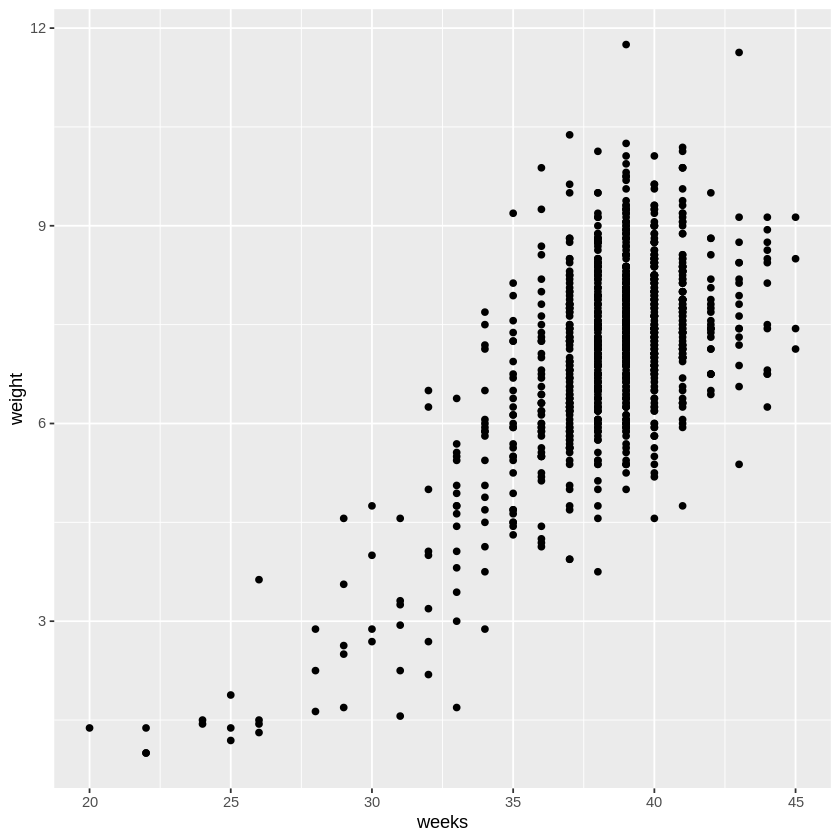

In [55]:
ggplot(data = ncbirths, aes(x = weeks, y = weight)) + 
  geom_point()

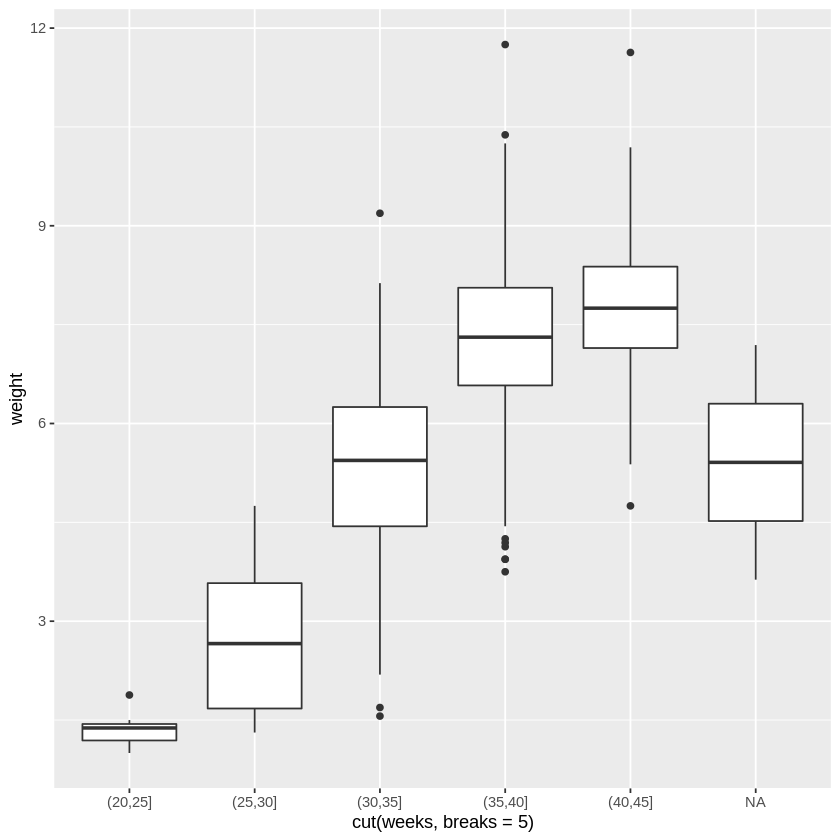

In [56]:
ggplot(data = ncbirths, 
       aes(x = cut(weeks, breaks = 5), y = weight)) + 
  geom_boxplot()

In [57]:
data(mammals)

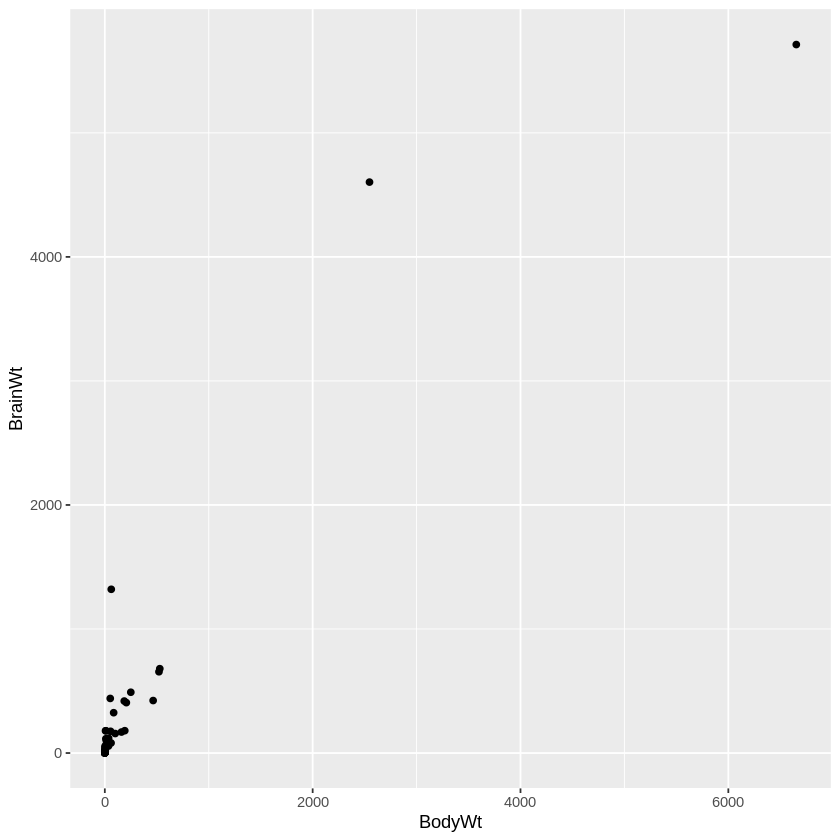

In [58]:
# Mammals scatterplot
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point()

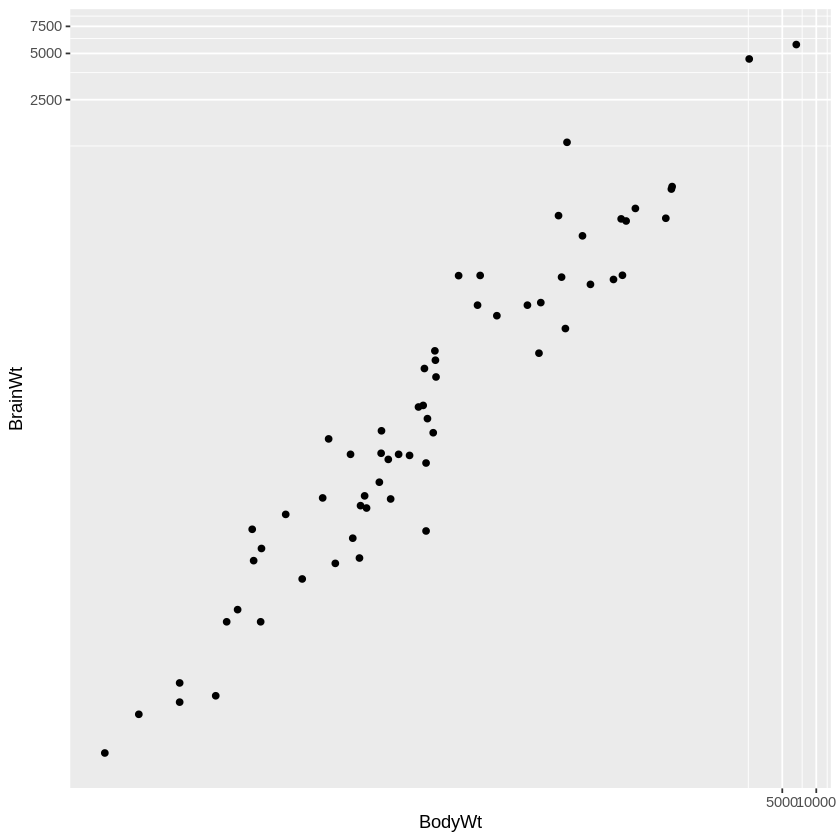

In [59]:
# Scatterplot with coord_trans()
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() + 
  coord_trans(x = "log10", y = "log10")

## Про корреляцию

In [60]:
# Compute correlation
ncbirths %>%
  summarize(N = n(), r = cor(weight, mage))

# Compute correlation for all non-missing pairs
ncbirths %>%
  summarize(N = n(), r = cor(weight, weeks, use = "pairwise.complete.obs"))

N,r
<int>,<dbl>
1000,0.05506589


N,r
<int>,<dbl>
1000,0.6701013


In [61]:
data(anscombe)

In [62]:
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


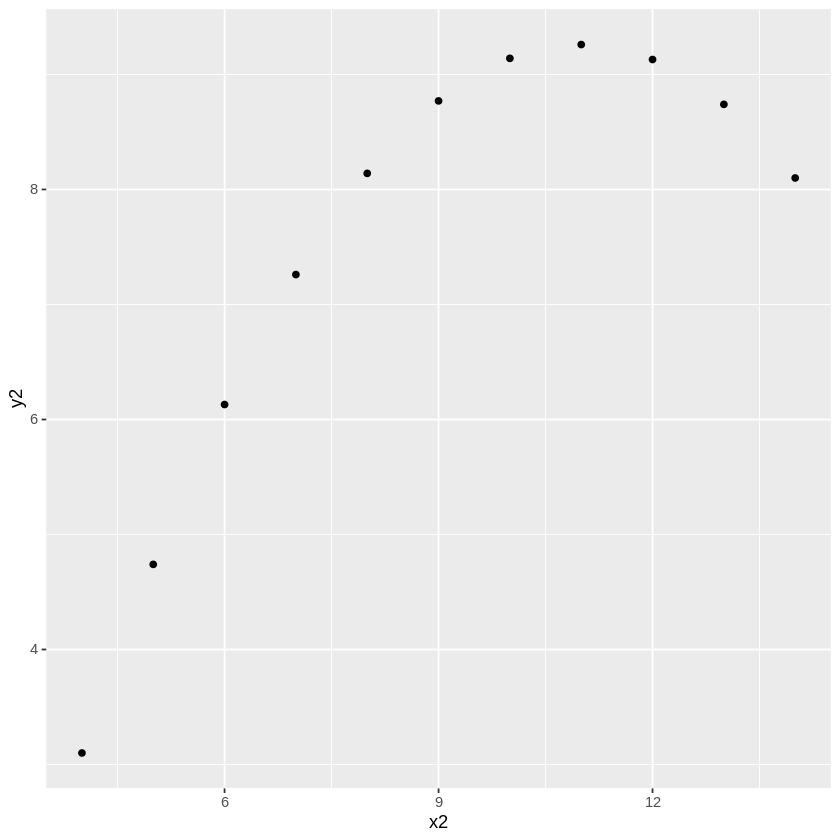

In [63]:
ggplot(data = anscombe, aes(x = x2, y = y2)) +
  geom_point() 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


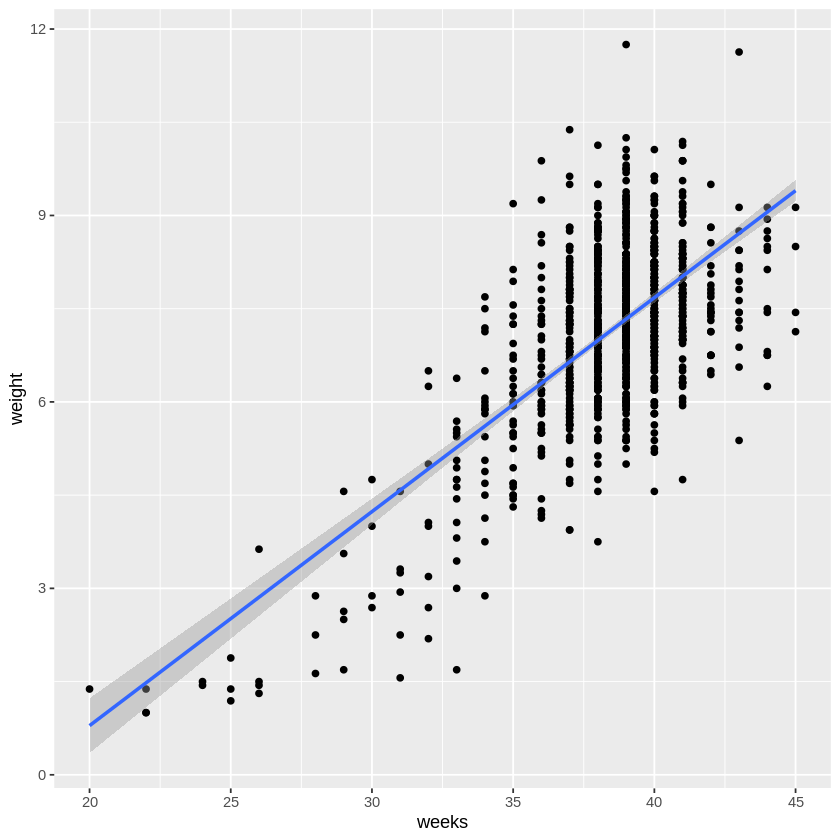

In [64]:
ggplot(data = ncbirths, aes(x = weeks, y = weight)) + 
  geom_point()+geom_smooth(method = "lm")

In [65]:
ncbirths <- drop_na(ncbirths)

`geom_smooth()` using formula 'y ~ x'



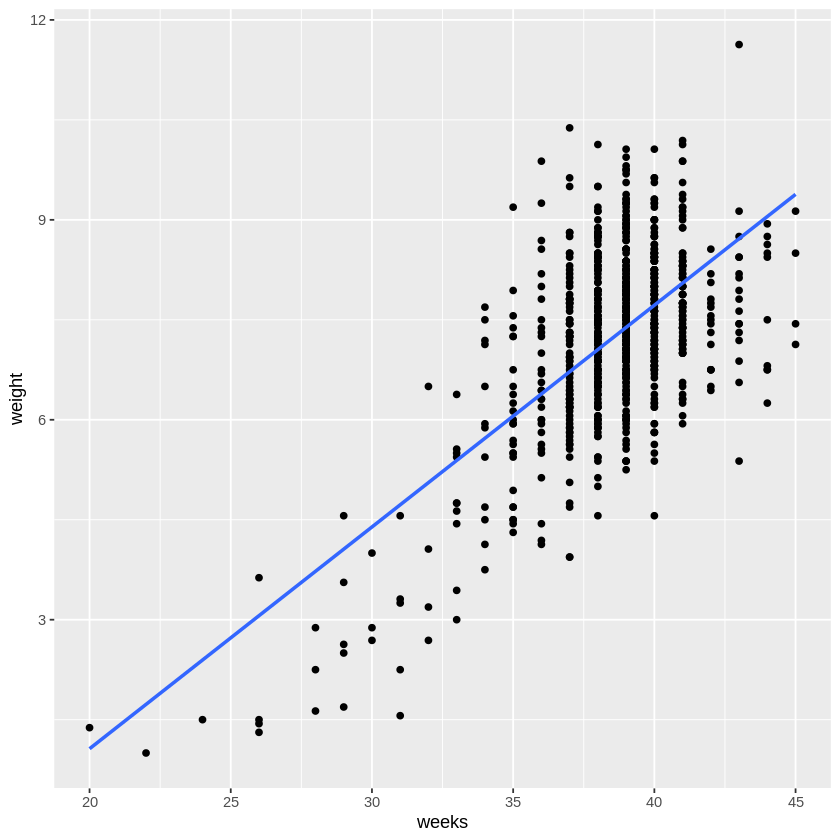

In [66]:
ggplot(data = ncbirths, aes(x = weeks, y = weight)) + 
  geom_point()+geom_smooth(method = "lm", se = FALSE)